In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Take care of missing values:

The features ticket and cabin have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

In [4]:
df = df.drop(['Ticket','Cabin'], axis=1)
df = df.dropna()

In [9]:
# specifies the parameters
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters 
plt.title("Passengers per boarding location")
plt.show()

(-1, 2)

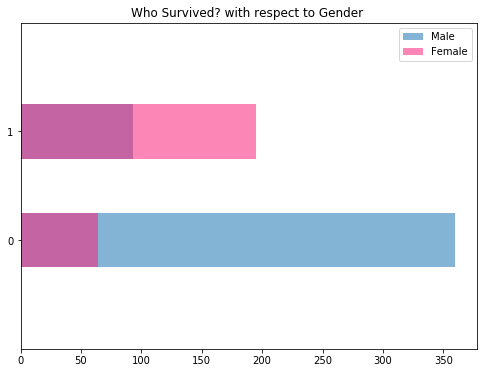

In [15]:
fig = plt.figure(figsize=(18,6))
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

In [16]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.show()

In [18]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.show()

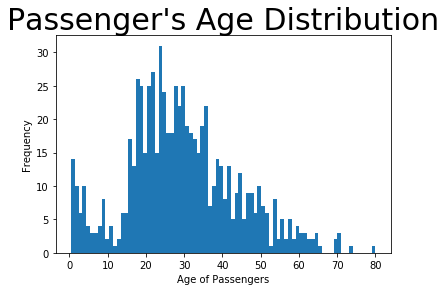

In [19]:
age_data = df['Age']
plt.hist(age_data.dropna(), bins = 80) #As the max age is 80
plt.xlabel("Age of Passengers")
plt.ylabel("Frequency")
plt.title("Passenger's Age Distribution", fontsize = 30, color = 'black')
plt.show()

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64


C:\Users\arnab saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


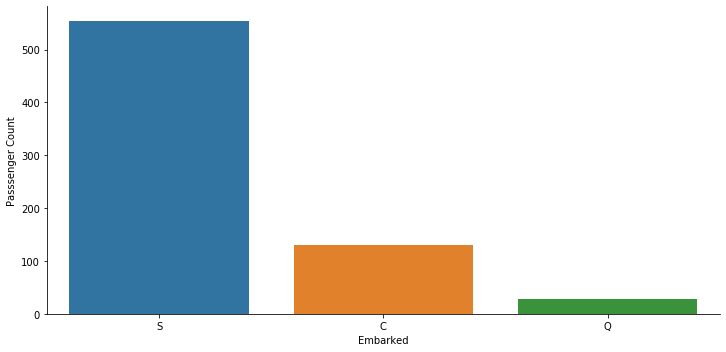

In [20]:
embarked_count = df.groupby('Embarked')['PassengerId'].count()
print(embarked_count)

embarked_data = sns.factorplot('Embarked', data = df, kind = 'count', aspect = 2)
plt.ylabel("Passsenger Count")
plt.show()

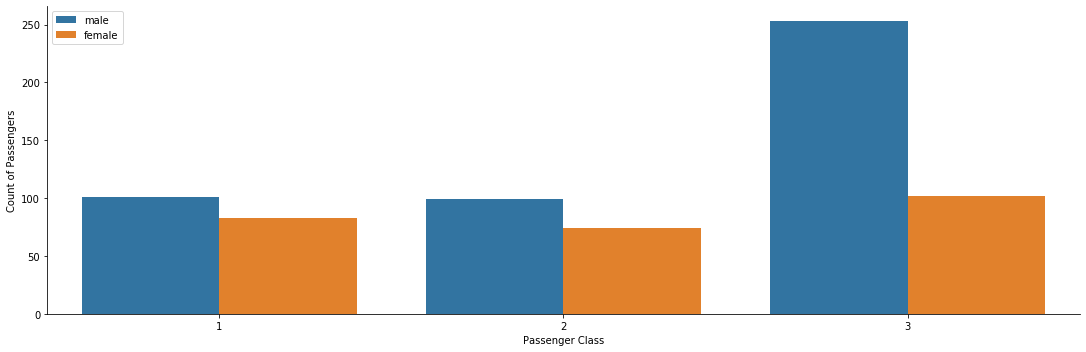

In [21]:
gender_class = sns.factorplot('Pclass', data = df, hue = 'Sex',kind = 'count', legend = False, aspect = 3)
plt.legend(loc = "upper left")
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

C:\Users\arnab saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


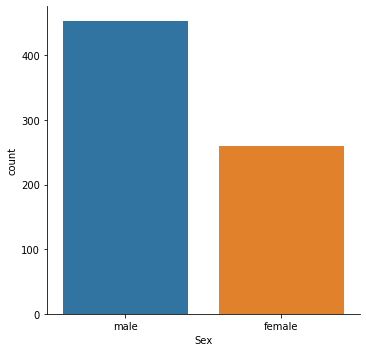

In [12]:
sns.factorplot('Sex', data=df, kind="count")
plt.show()

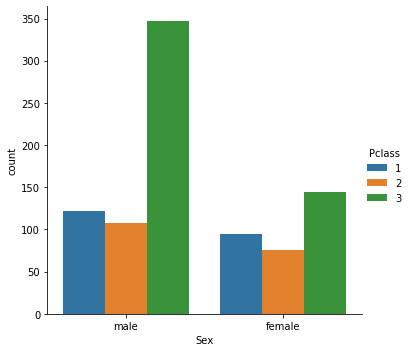

In [4]:
sns.factorplot('Sex', data=df, kind="count", hue='Pclass')
plt.show()

In [5]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [6]:
df['Person']= df[['Age','Sex']].apply(male_female_child, axis=1)

In [7]:
df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

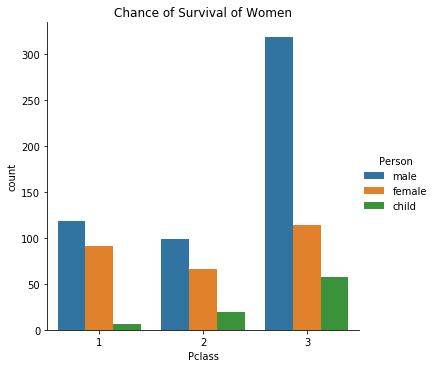

In [8]:
sns.factorplot('Pclass', data=df, kind="count", hue='Person')
plt.title("Chance of Survival of Women")
plt.show()

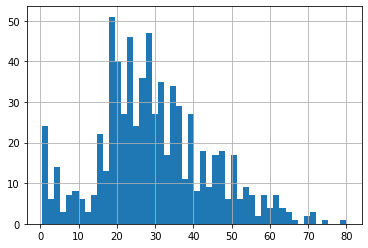

In [9]:
df['Age'].hist(bins=50)
plt.show()

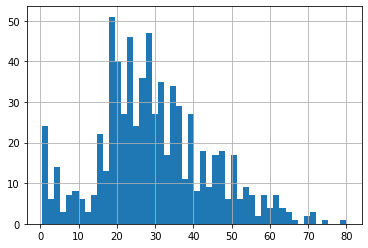

In [10]:
df['Age'].hist(bins=50)
plt.show()

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

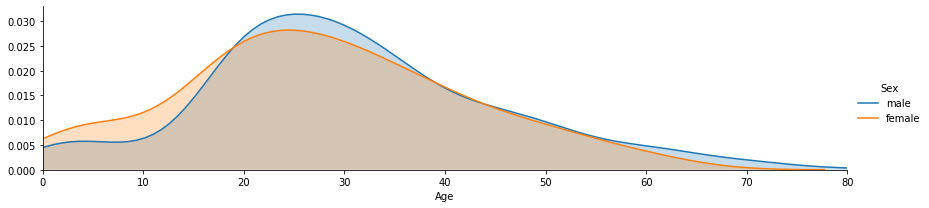

In [13]:
fig = sns.FacetGrid(df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

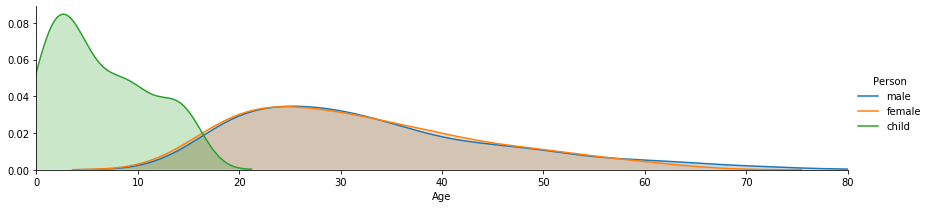

In [15]:
fig = sns.FacetGrid(df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
oldest =df['Age'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()
plt.show()

In [17]:
deck = df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

### We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

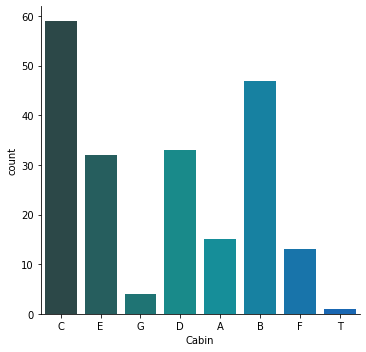

In [19]:
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')
plt.show()

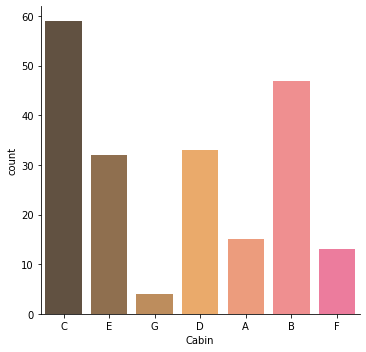

In [21]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin', data=cabin_df, palette='spring_d',kind='count')
plt.show()

In [23]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Person  
0        0         A/5 21171   7.2500   NaN        S    male  
1        0          PC 17599  71.2833   C85        C  female  
2        0  STON/O2. 3101282   7.9250   NaN        S  female  
3        0            113803  53.1000  C123        S  female  
4        0            373450   8.0500   NaN        S    male  
..     ...               ...      ...   ...      ...     ...  
886      0            211536  13.0000   NaN        S    male  
887      0            112053  30.0000   B42        S  female  
888      2        W./C. 6607  23.4500   NaN        S  female  
889      0            111369  30.0000  C148        C    male  
890      0            370376   7.7500   NaN        Q    male  

[891 rows x 13 columns]

C:\Users\arnab saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


AttributeError: 'Rectangle' object has no property 'x_order'

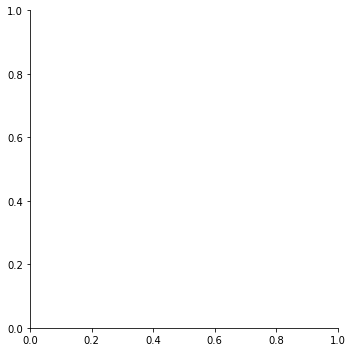

In [26]:
sns.factorplot('Embarked',data=df,hue='Pclass',x_order=['C','Q','S'],kind='count')

In [27]:
df['Alone'] = df.Parch + df.SibSp
df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [28]:
df['Alone'].loc[df['Alone'] >0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'

C:\Users\arnab saha\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

In [30]:
df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

[]

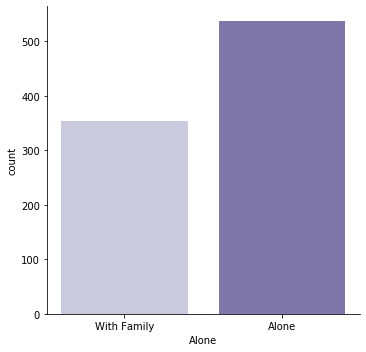

In [32]:
sns.factorplot('Alone', data=df, palette='Purples', kind='count')
plt.plot()

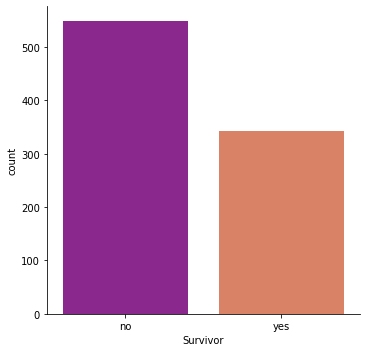

In [33]:
df['Survivor'] = df.Survived.map({0:'no', 1:'yes'})
sns.factorplot('Survivor', data=df, palette='plasma', kind='count')
plt.show()

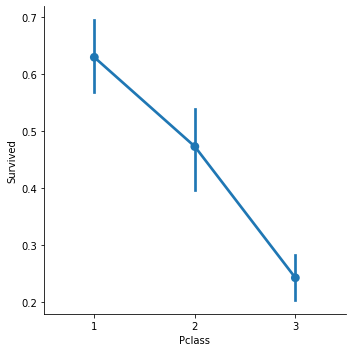

In [35]:
sns.factorplot('Pclass','Survived',data=df)
plt.show()

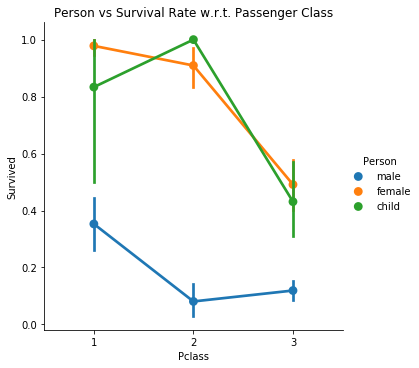

In [38]:
sns.factorplot('Pclass', 'Survived', hue='Person', data=df)
plt.title("Person vs Survival Rate w.r.t. Passenger Class")
plt.show()

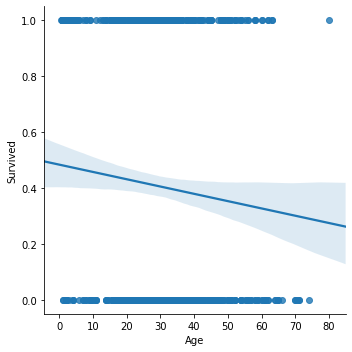

In [41]:
sns.lmplot('Age','Survived', data=df)
plt.show()

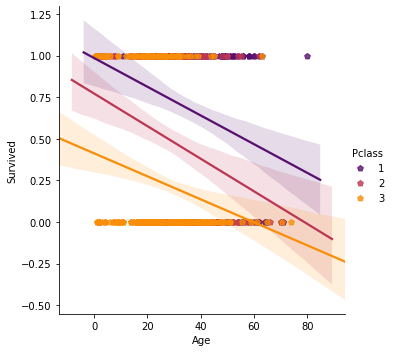

In [44]:
sns.lmplot('Age','Survived',hue='Pclass', data=df, palette='inferno',markers='p')
plt.show()

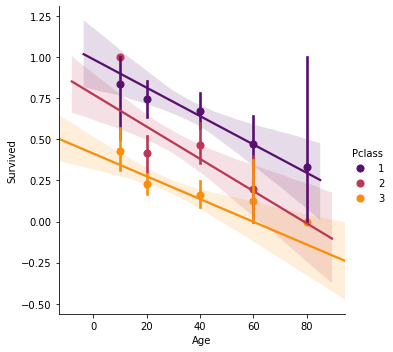

In [46]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data=df, palette='inferno',x_bins=generations)
plt.show()

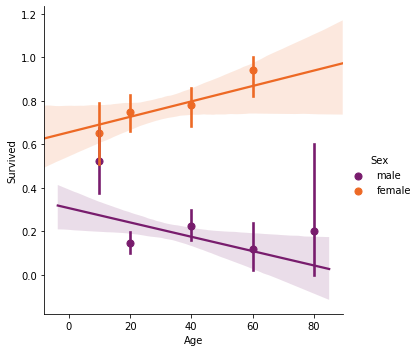

In [48]:
sns.lmplot('Age','Survived',hue='Sex', data=df, palette='inferno',x_bins=generations)
plt.show()

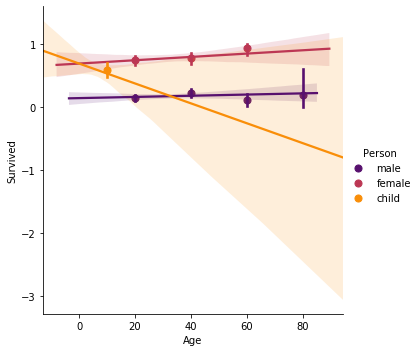

In [50]:
sns.lmplot('Age','Survived',hue='Person', data=df, palette='inferno',x_bins=generations)
plt.show()

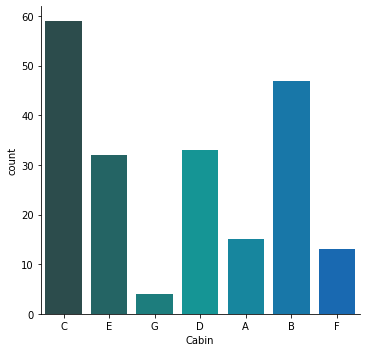

In [52]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')
plt.show()

In [54]:
cabin_df = pd.concat([cabin_df,df['Sex']], axis=1)

In [55]:
cabin_df = pd.concat([cabin_df, df['Survived']], axis=1)

In [56]:
cabin_df.head()

Cabin     Sex  Survived
0     C    male         0
1     C  female         1
2     E  female         1
3     G  female         1
4     C    male         0

C:\Users\arnab saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


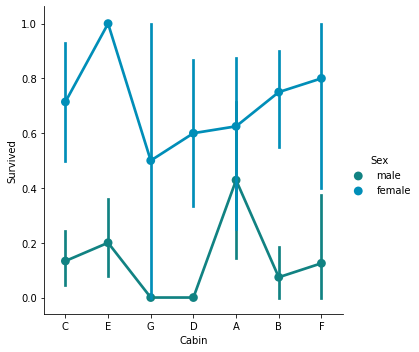

In [60]:
sns.factorplot('Cabin','Survived',data=cabin_df, hue='Sex', palette='winter_d')
plt.show()

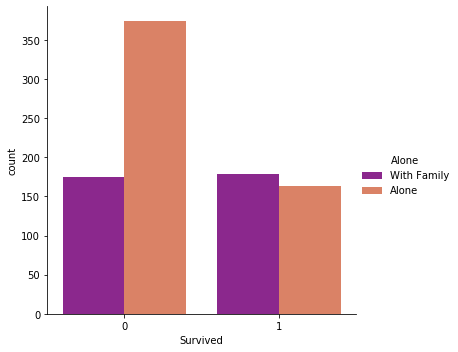

In [62]:
sns.factorplot('Survived',data=df, hue='Alone',palette='plasma',kind='count')
plt.show()

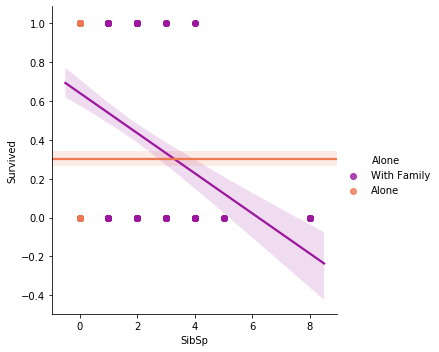

In [63]:
sns.lmplot('SibSp','Survived',data=df, hue='Alone',palette='plasma')
plt.show()

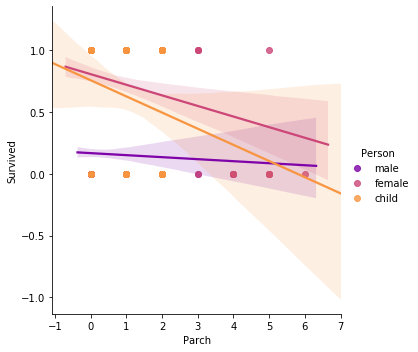

In [64]:
sns.lmplot('Parch','Survived',data=df, hue='Person',palette='plasma')
plt.show()

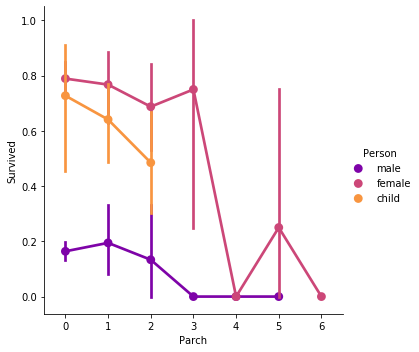

In [65]:
sns.factorplot('Parch','Survived',data=df, hue='Person',palette='plasma')
plt.show()

Survived
0    424
1    288
Name: PassengerId, dtype: int64


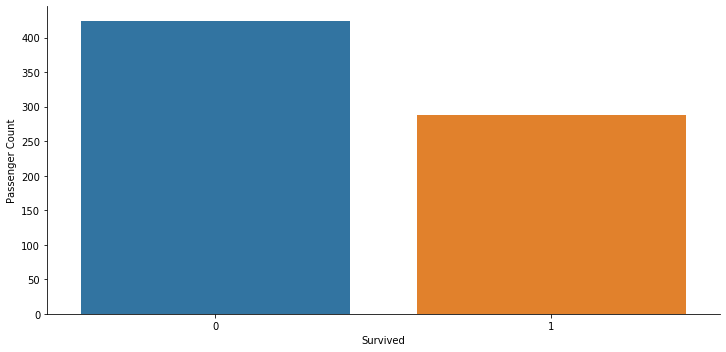

In [22]:
print(df.groupby('Survived')['PassengerId'].count())
survival_dist = sns.factorplot('Survived',data=df,kind = 'count', aspect = 2)
plt.ylabel("Passenger Count")
plt.show()

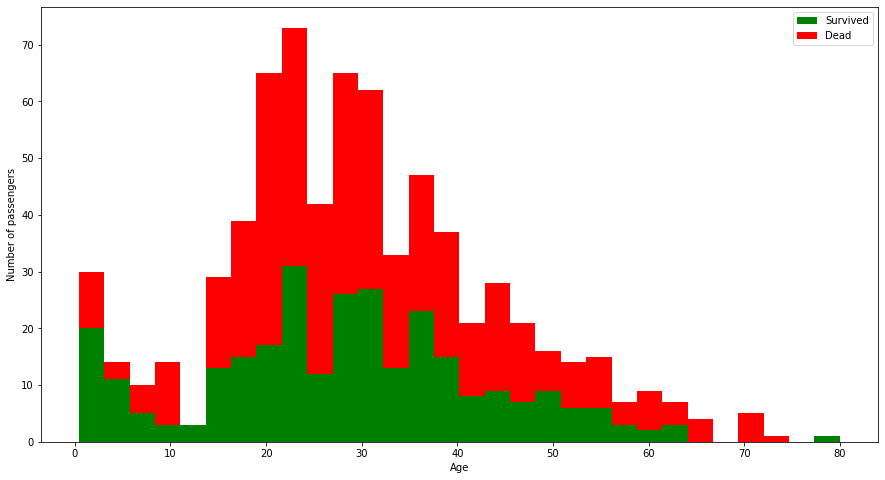

In [23]:
plt.figure(figsize=(15,8))
plt.hist([df.dropna()[df.dropna()['Survived']==1]['Age'], df.dropna()[df.dropna()['Survived']==0]['Age']], stacked=True,
         color = ['g','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

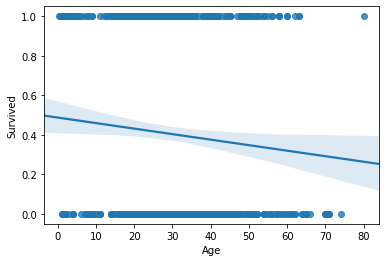

In [24]:
age_corr = sns.regplot('Age','Survived',data = df)
plt.show()

Survival By Gender

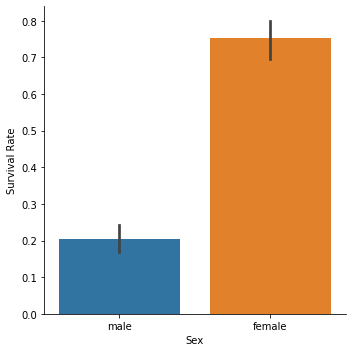

In [28]:
survival_by_gender = sns.factorplot('Sex','Survived',data=df,kind = 'bar', aspect = 1)
plt.ylabel("Survival Rate")
plt.show()

In [33]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 11:
        return 'child'
    else:
        return sex

In [34]:
df['Person']= df[['Age','Sex']].apply(male_female_child, axis=1)

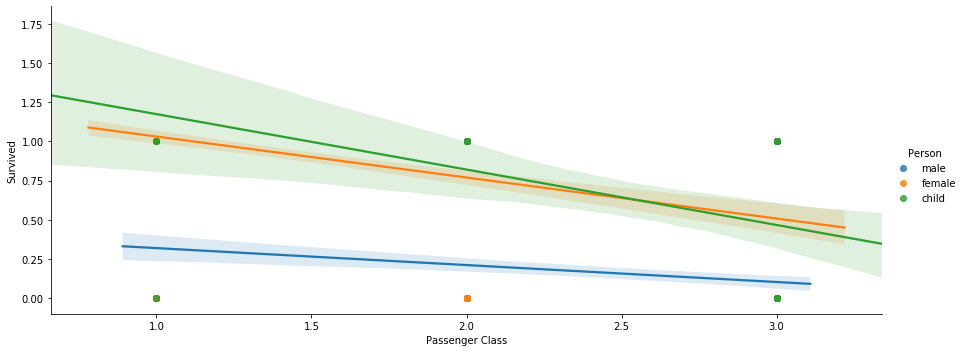

In [36]:
sns.lmplot('Pclass','Survived',data = df,hue = 'Person', aspect =2.5 )
plt.xlabel("Passenger Class")
plt.show()

### Distribution of Age by Survival

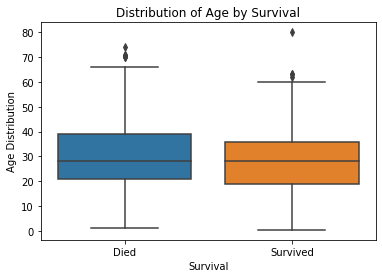

In [38]:
age_dist = sns.boxplot(data=df, x='Survived', y='Age')
age_dist.set(title='Distribution of Age by Survival', xlabel = 'Survival', ylabel = 'Age Distribution', xticklabels = ['Died', 'Survived'])
plt.show()

Distribution of Age by Gender and Survival

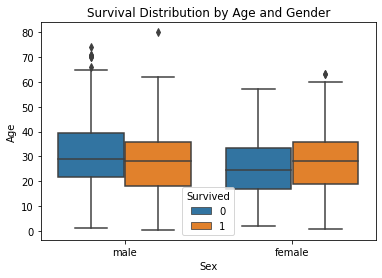

In [31]:
age_gender_dist = sns.boxplot(data=df.dropna(subset = ['Age']), x= 'Sex', y = 'Age', hue='Survived')
age_gender_dist.set(title='Survival Distribution by Age and Gender')
plt.show()

Distribution of Age by Class and Survival

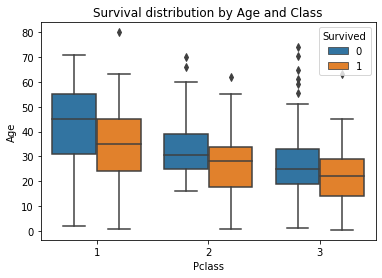

In [32]:
age_class_dist = sns.boxplot(data = df.dropna(subset = ['Age']).sort_values('Pclass'), x='Pclass', y='Age', hue='Survived')
age_class_dist.set(title='Survival distribution by Age and Class', xlabel='Pclass')
plt.show()